# **Mineduc Data Cleansing** ✨

Este notebook está diseñado para realizar el proceso de limpieza de datos obtenidos de establecimientos educativos de Guatemala hasta el nivel diversificado. El objetivo principal es preparar un conjunto de datos limpio y consistente que facilite el análisis posterior.

A lo largo del notebook, se utilizan diversas herramientas y técnicas para acceder a la fuente de datos especificada, asegurando que la recolección de datos sea transparente y reproducible. Se documentan todas las operaciones de limpieza llevadas a cabo, lo que permite a otros verificar y comprender cada paso del proceso.

Las actividades incluyen la descarga de datos en archivos .csv, la descripción del estado inicial de los datos y las operaciones de limpieza necesarias. Se presta especial atención a campos críticos, como nombre, dirección y teléfono, para garantizar la integridad de la información. Las inconsistencias, como representaciones múltiples de valores nulos y errores ortográficos, son abordadas de manera sistemática para asegurar que el conjunto de datos final esté listo para un análisis efectivo.

**Authors:**
- [Daniel Valdez](https://github.com/Danval-003)
- [Emilio Solano](https://github.com/emiliosolanoo21)
- [Adrian Flores](https://github.com/adrianRFlores)
- [Andrea Ramírez](https://github.com/Andrea-gt)

***

## **(1) Import Libraries** ⬇️

In [1]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fuzzywuzzy import process, fuzz
import difflib
import re
from unidecode import unidecode

# Standard libraries
import warnings
warnings.filterwarnings('ignore')

# Evit to display warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
# Not dysplay UserWarning
warnings.filterwarnings('ignore', category=UserWarning)




# ===== ===== Reproducibility Seed ===== =====
# Set a fixed seed for the random number generator for reproducibility
random_state = 42

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

# Set the style of seaborn
sns.set(style="whitegrid")

## **(2)Data Upload** 📄

In [2]:
df = pd.read_csv('data/establecimientos.csv')
df.head(2)

,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


## **(2) Exploratory Analysis** 🔎

**Observaciones 💡 -->**

> - Este conjunto de datos se enfoca en la recopilación de información sobre establecimientos educativos en el país Guatemala. Los datos fueron obtenidos de la página oficial del [Ministerio de Educación](https://www.mineduc.gob.gt/BUSCAESTABLECIMIENTO_GE/). Incluye más de 9000 registros, aunque esto se detallará más adelante, que abarcan detalles de relevancia para el análisis y gestión de la educación en el país.

### **(1) Descripción General de los Datos**

In [3]:
# Print the number of records in the DataFrame
print("The given dataset has", df.shape[0], "registers and", df.shape[1], "columns.")

The given dataset has 9354 registers and 17 columns.


**Observaciones 💡 -->**

> - El conjunto de datos original contiene 9354 registros y 17 columnas, lo que sugiere que posee una dimensión relativamente grande. Cada uno de los 9354 registros representa una observación única, mientras que las 17 columnas corresponden a diferentes características o variables medidas para cada observación.

In [4]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9354 entries, 0 to 9353
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODIGO           9331 non-null   object
 1   DISTRITO         9123 non-null   object
 2   DEPARTAMENTO     9331 non-null   object
 3   MUNICIPIO        9331 non-null   object
 4   ESTABLECIMIENTO  9331 non-null   object
 5   DIRECCION        9280 non-null   object
 6   TELEFONO         8792 non-null   object
 7   SUPERVISOR       9122 non-null   object
 8   DIRECTOR         8434 non-null   object
 9   NIVEL            9331 non-null   object
 10  SECTOR           9331 non-null   object
 11  AREA             9331 non-null   object
 12  STATUS           9331 non-null   object
 13  MODALIDAD        9331 non-null   object
 14  JORNADA          9331 non-null   object
 15  PLAN             9331 non-null   object
 16  DEPARTAMENTAL    9331 non-null   object
dtypes: object(17)
memory usage: 1.2+ 

**Observaciones 💡 -->**

> - En el análisis preliminar del conjunto de datos, se observa que varias columnas, aunque almacenadas como objetos, contienen datos que podrían beneficiarse de una conversión a tipos más apropiados aunque no es escencial. Por ejemplo, las columnas CODIGO, TELEFONO y DISTRITO, a pesar de ser objetos, ***podrían*** ser tratadas como datos categóricos o numéricos si se requiere un análisis más detallado. Sin embargo, estas son decisiones que se tomarán en el futuro y por ahora es una simple observación.

### **(2) Clasificación de las Variables**

| Nombre           | Descripción                                                                                       | Clasificación                                                                                   |
|------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| Código           | Identifica de manera única a cada establecimiento.                                                | Variable cualitativa descriptiva                                                               |
| Establecimiento  | Nombre del establecimiento educativo.                                                             | Variable cualitativa descriptiva                                                               |
| Dirección        | Ubicación física del establecimiento.                                                             | Variable cualitativa descriptiva                                                               |
| Teléfono         | Número de teléfono del establecimiento.                                                           | Variable  cualitativa descriptiva                                                                 |
| Director         | Nombre del director del establecimiento.                                                          | Variable cualitativa descriptiva                                                               |
| Distrito         | Clasifica el establecimiento dentro de un distrito específico.                                     | Variable cualitativa categórica                                                                |
| Departamento     | Indica el departamento donde se encuentra cada establecimiento.                                    | Variable cualitativa categórica                                                                |
| Municipio        | Define el municipio donde se localiza cada establecimiento.                                        | Variable cualitativa categórica                                                                |
| Nivel            | Nivel educativo ofrecido por el establecimiento (ej. diversificado, primaria, etc.).               | Variable cualitativa categórica                                                                |
| Sector           | Tipo de sector educativo (ej. público, privado).                                                  | Variable cualitativa categórica                                                                |
| Área             | Área geográfica del establecimiento (ej. urbana, rural).                                          | Variable cualitativa categórica                                                                |
| Estado           | Estado actual del establecimiento (ej. abierto, cerrado).                                          | Variable cualitativa categórica                                                                |
| Modalidad        | Modalidad de enseñanza ofrecida (ej. monolingüe, bilingüe).                                        | Variable cualitativa categórica                                                                |
| Jornada          | Tipo de jornada educativa (ej. matutina, vespertina).                                              | Variable cualitativa categórica                                                                |
| Plan             | Plan educativo implementado (ej. diario, semanal).                                                | Variable cualitativa categórica                                                                |
| Departamental    | Departamento administrativo al que pertenece el establecimiento.                                   | Variable cualitativa categórica                                                                |
| Supervisor       | Nombre del supervisor del establecimiento.                                                        | Variable cualitativa categórica                                                                |

**Observaciones 💡 -->**

> - El conjunto de datos posee alrededor de 4 variables cualitativas descriptivas.
> - El resto de variables, 12 de ellas, son variables cualitaticas categóricas.

### **(3) Exploración y Limpieza Inicial de los Datos**

In [5]:
# Transpose the first 3 rows of the DataFrame
# to display column names as rows for better readability.
df.head(3).T

,0,1,2
CODIGO,16-01-0138-46,16-01-0139-46,16-01-0140-46
DISTRITO,16-031,16-031,16-031
DEPARTAMENTO,ALTA VERAPAZ,ALTA VERAPAZ,ALTA VERAPAZ
MUNICIPIO,COBAN,COBAN,COBAN
ESTABLECIMIENTO,COLEGIO COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,"COLEGIO ""LA INMACULADA"""
DIRECCION,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,KM 209.5 ENTRADA A LA CIUDAD,7A. AVENIDA 11-109 ZONA 6
TELEFONO,77945104,77367402,78232301
SUPERVISOR,MERCEDES JOSEFINA TORRES GALVEZ,MERCEDES JOSEFINA TORRES GALVEZ,MERCEDES JOSEFINA TORRES GALVEZ
DIRECTOR,GUSTAVO ADOLFO SIERRA POP,GILMA DOLORES GUAY PAZ DE LEAL,VIRGINIA SOLANO SERRANO
NIVEL,DIVERSIFICADO,DIVERSIFICADO,DIVERSIFICADO


**🖊 Modificación de Etiquetas de Variables -->**

> - Para facilitar la comprensión y el manejo del conjunto de datos, se procederá a modificar los nombres de las variables. Este cambio permitirá una organización más clara y una interpretación más precisa de la información.

In [6]:
rename_col = {
    'CODIGO': 'code',
    'DISTRITO': 'district',
    'DEPARTAMENTO': 'department',
    'MUNICIPIO': 'municipality',
    'ESTABLECIMIENTO': 'school_name',
    'DIRECCION': 'address',
    'TELEFONO': 'phone',
    'SUPERVISOR': 'supervisor',
    'DIRECTOR': 'director',
    'NIVEL': 'education_level',
    'SECTOR': 'sector',
    'AREA': 'area',
    'STATUS': 'status',
    'MODALIDAD': 'teaching_mode',
    'JORNADA': 'schedule',
    'PLAN': 'plan',
    'DEPARTAMENTAL': 'departmental'
}

In [7]:
# Use a pandas function to rename the current function
df = df.rename(columns = rename_col)
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,education_level,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


#### **(1) Frecuencias y Conteo de los Datos**

In [8]:
# Create a list with descriptive columns
descriptive = ["code", "school_name", "address", "director", "number"]

# Create a list with categorical columns
categorical = ["district", "department", "municipality", "education_level", "sector", "area", "status", "teaching_mode", "schedule", "plan", "departmental", "supervisor"]

In [9]:
group_size = 6  # Len of groups to show
num_groups = len(categorical) // group_size + (len(categorical) % group_size > 0) # Number of groups

# Iterate over the groups and print the description
for i in range(num_groups):
    start = i * group_size
    end = (i + 1) * group_size
    group_cols = categorical[start:end]    
    
    # Use .describe() to get the description of the columns
    description = df[group_cols].describe()
    styler = description.style.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]}
    ])
    # Display the description
    display(styler)

,district,department,municipality,education_level,sector,area
count,9123,9331,9331,9331,9331,9331
unique,690,23,349,1,4,3
top,01-403,CIUDAD CAPITAL,ZONA 1,DIVERSIFICADO,PRIVADO,URBANA
freq,268,1564,633,9331,7956,7606


,status,teaching_mode,schedule,plan,departmental,supervisor
count,9331,9331,9331,9331,9331,9122
unique,4,2,6,13,26,659
top,ABIERTA,MONOLINGUE,DOBLE,DIARIO(REGULAR),GUATEMALA NORTE,CARLOS HUMBERTO GONZALEZ DE LEON
freq,6545,9039,3037,5721,1050,333


**🏅 Top 10 Valores Por Columna -->**

In [10]:
# See what are the 10 most frequent values for each of the dataframe columns
for column in df.columns:
    frequency_values = df[column].value_counts().head(10)
    print("Top 10 most frequent values for column '{}':".format(column))
    for index, (value, frequency) in enumerate(frequency_values.items(), start=1):
        print("{:<5} {:<30} {:<10}".format(index, value, frequency))
    print("\n===============================================")

Top 10 most frequent values for column 'code':
1     16-01-0138-46                  1         
2     17-01-4075-46                  1         
3     17-03-0095-46                  1         
4     17-03-0098-46                  1         
5     17-03-0099-46                  1         
6     17-03-0101-46                  1         
7     17-03-0102-46                  1         
8     17-03-0104-46                  1         
9     17-03-0111-46                  1         
10    17-03-0113-46                  1         

Top 10 most frequent values for column 'district':
1     01-403                         268       
2     11-017                         176       
3     05-033                         167       
4     01-411                         167       
5     18-008                         130       
6     05-007                         104       
7     01-641                         103       
8     18-039                         102       
9     10-019                         

**Observaciones 💡 -->**

1. Es importante señalar que la columna `code` contiene únicamente valores únicos para cada entrada, lo que sugiere que no aporta información significativa al conjunto de datos y podría considerarse prescindible para los análisis posteriores.

2. Por otro lado, la columna `district` presenta múltiples entradas repetidas, siendo 01-403 la más frecuente en el conjunto de datos. Esta repetición podría ser útil para identificar patrones en la distribución de la data, aunque se requiere un análisis más profundo para determinar su relevancia.

3. En cuanto a la columna `municipality`, se ha observado que contiene entradas inconsistentes. En esta columna se registran, en su mayoría, los nombres de los municipios de los departamentos, pero también aparecen nombres de zonas específicas de la ciudad capital, lo que indica una falta de un formato de entrada adecuado. En relación con esto último, es importante tener en cuenta que los municipios de Guatemala no incluyen sus zonas, por lo que la presencia de estas entradas no solo es inconsistente, sino también incorrecta en el contexto de los datos. Todo esto ees algo a tomar en consideración durante el proceso de limpieza.

4. Un aspecto interesante relacionado con la integridad de los datos se observa en la columna `director`. En esta columna, se encuentran 83 valores representados como "---", 28 como "----", 27 como "--" y 14 como "SIN DATO". Esta variedad en la representación de los valores nulos es significativa y debe ser considerada cuidadosamente en el análisis de datos faltantes. Es crucial realizar las modificaciones necesarias para clasificar correctamente estos valores nulos, ya que su manejo inadecuado podría afectar las conclusiones extraídas del conjunto de datos. Vemos este mismo problema en la columna `area`, donde los valores nulos tienen OTRO tipo de codificación, siendo esta "SIN ESPECIFICAR".

5. Por otro lado, la columna `education_level` presenta una notable falta de diversidad en sus entradas, ya que se limita únicamente al valor "DIVERSIFICADO". Esta homogeneidad plantea la pregunta sobre la utilidad de esta columna en la data, ya que no proporciona información escencial que permita realizar comparaciones o análisis significativos.

6. La columna `plan` presenta una distribución notablemente desigual en sus valores, con "DIARIO(REGULAR)" como el más frecuente y otros planes mostrando significativamente menos entradas.  Se considera que se debería realizar una limpieza de datos en esta columna, lo que incluye verificar la consistencia en la nomenclatura de los planes, unificar categorías similares, manejar posibles datos faltantes y considerar la eliminación o agrupación de planes con baja frecuencia que no aporten valor significativo.

7. La columna `departamental` incluye nombres de departamentos del país, pero también presenta regiones específicas que son inconsistentes en su nomenclatura. Dada esta situación, se sugiere agrupar ciertas entradas para proporcionar mayor coherencia y utilidad a la columna. En particular, sería recomendable unificar las diversas regiones de la ciudad capital bajo la etiqueta "Guatemala" y asegurarse de que no existan otras entradas que estén separadas por regiones, lo que podría llevar a confusiones en el análisis.

#### **(2) Análisis de Valores Duplicados**

In [11]:
# Check duplicate rows in dataset
df = df.drop_duplicates()

In [12]:
# Print the number of records in the DataFrame
print("The given dataset has", df.shape[0], "registers and", df.shape[1], "columns.")

The given dataset has 9332 registers and 17 columns.


**Observaciones 💡 -->**

> - Se identificaron 22 entradas duplicadas en el conjunto de datos, lo que representa aproximadamente el 0.5% del total.
> - Este problema ya fue abordado durante la etapa de limpieza preliminar.

## **(4) Data Cleansing 🫧**

### **(1) Errores Estructurales**

<div class="alert alert-block alert-info">
<b>Nota:</b> Los errores estructurales surgen al recolectar o trasladar datos, evidenciándose en nombres inusuales, faltas de ortografía o uso incorrecto de mayúsculas, llevando así a clasificaciones erróneas.
</div>

#### **(1) Columna "department"**

En primer lugar, es fundamental abordar el tema de la capitalización de los nombres de los departamentos en Guatemala. En el dataset original, se ha encontrado que los nombres de los departamentos están mayormente en minúsculas, lo que representa un evidente error. La correcta capitalización de los nombres no solo es importante desde el punto de vista estético, sino que también garantiza la integridad y precisión de la información, evitando confusiones que podrían surgir en el manejo y la interpretación de los datos.

In [13]:
# Capitalizing the values of a single column
df['department'] = df['department'].str.title()

A continuación, se llevará a cabo un análisis más detallado de los valores contenidos en la columna de departamentos. En primer lugar, se convertirá esta columna en una lista para facilitar el análisis. A partir de esta lista, se extraerán los valores únicos, para tratar de identificar posibles errores relacionados con la acentuación, así como otros tipos de inconsistencias que puedan existir.

In [14]:
# Converting the column to a list
column_to_list = df['department'].unique().tolist()

# Convert all elements to strings to avoid TypeError
column_to_list_str = [str(department) for department in column_to_list]

# Pretty print the list and its length
print("Unique Departments:")
print(", ".join(column_to_list_str))
print(f"\nTotal number of unique departments: {len(column_to_list_str)}")

Unique Departments:
Alta Verapaz, nan, Baja Verapaz, Chimaltenango, Chiquimula, Ciudad Capital, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Peten, Quetzaltenango, Quiche, Retalhuleu, Sacatepequez, San Marcos, Santa Rosa, Solola, Suchitepequez, Totonicapan, Zacapa

Total number of unique departments: 24


**Observaciones 💡 -->**

Vemos que existen un punto importante a resolver.
1. **Inconsistencias en la Clasificación de Departamentos**
    Oficialmente, solo existen 22 entidades subnacionales de primer orden denominadas como departamentos en Guatemala. Sin embargo, al revisar la lista, se identifican 23 nombres de departamentos, exceptuando el nulo, lo que indica una clasificación errónea. Al examinar detenidamente, se encuentra que hay dos entradas: "Ciudad Capital" y "Guatemala", las cuales hacen referencia al mismo departamento. El nombre correcto es "Departamento de Guatemala"; por lo tanto, se procederá a unir estas dos entradas y renombrarlas adecuadamente.

Es importante destacar que se abordará la correcta identificación de valores nulos en esta columna en esta misma sección.

In [15]:
# Dictionary mapping incorrect department names to correct ones
department_corrections = {
    "Ciudad Capital": "Guatemala", # Corrected
    "nan": np.nan  # Replace nan with None or keep it as needed
}

In [16]:
# Replace department names in the DataFrame
df['department'] = df['department'].replace(department_corrections)

In [17]:
# Count occurrences of each unique value
value_counts = df['department'].value_counts()
# Display the occurrences
print(value_counts)

Guatemala         3041
Escuintla          628
San Marcos         574
Huehuetenango      516
Quetzaltenango     491
Suchitepequez      385
Alta Verapaz       374
Izabal             368
Peten              366
Chimaltenango      359
Sacatepequez       319
Retalhuleu         316
Jutiapa            310
Quiche             244
Chiquimula         170
Santa Rosa         158
Jalapa             151
Solola             138
El Progreso        125
Baja Verapaz       114
Zacapa              94
Totonicapan         90
Name: department, dtype: int64


#### **(2) Columna "municipality"**

Al igual que en la justificación presentada anteriormente, se abordarán los problemas de capitalización en la columna de municipios para garantizar la consistencia y la claridad en el análisis.

Además, a partir de las tablas de frecuencia, hemos identificado que hay varias entradas en esta columna que comienzan con la palabra "zona". Dado el contexto de los datos, se ha determinado que estas entradas son incorrectas y no reflejan adecuadamente la estructura geográfica de Guatemala. Por lo tanto, se procederá a clasificar todas estas entradas como "Guatemala" para asegurar que el dataset mantenga una representación precisa y uniforme de los municipios del país.

In [18]:
# Capitalizing the values of a single column
df['municipality'] = df['municipality'].str.title()
# Replace entries that start with "Zona"
df['municipality'] = df['municipality'].replace(to_replace=r'^Zona.*', value='Guatemala', regex=True)
# Replace 'nan' strings with np.nan
df['municipality'] = df['municipality'].replace('nan', np.nan)

In [19]:
# Count occurrences of each unique value
value_counts = df['municipality'].value_counts()
# Display the occurrences
print(value_counts)

Guatemala             1567
Mixco                  428
Villa Nueva            370
Quetzaltenango         248
Retalhuleu             185
                      ... 
San Miguel Siguila       1
Patzite                  1
Chiche                   1
Zunil                    1
San Jorge                1
Name: municipality, Length: 328, dtype: int64


**Observaciones 💡 -->**

> - Tras realizar una exhaustiva investigación, se ha confirmado que, salvo por algunas faltas de tildes, no existen discrepancias en los nombres de los municipios en el dataset. Esta afirmación se respalda con la información disponible en este [sitio web](https://es.wikipedia.org/wiki/Anexo:Municipios_de_Guatemala), donde se listan los departamentos junto con sus respectivos municipios.

#### **(3) Columna "address"**

In [20]:
# Count occurrences of each unique value
value_counts = df['address'].value_counts()
# Display the occurrences
print(value_counts)

CABECERA MUNICIPAL                                                       270
BARRIO EL CENTRO                                                          60
BARRIO EL CALVARIO                                                        19
BARRIO EL PORVENIR                                                        19
BARRIO LAS FLORES                                                         15
                                                                        ... 
SECTOR 1 MANZANA "B2 LOTE 31 Y 32, COLONIA PLANES DEL MILAGRO, ZONA 0      1
28 CALLE  28-00 COLONIA  EL  MOLINO                                        1
SECTOR 1, MANZANA  "B"  LOTES 31 Y 32, COLONIA PLANES DEL MILAGRO          1
CANTON RIO SALJÁ KM. 13 1/2 CHINAUTLA VIEJA                                1
BARRIO EL  CAMPO                                                           1
Name: address, Length: 6084, dtype: int64


**Observaciones 💡 -->**

En el conjunto de datos, se ha identificado que la columna de direcciones es una de las más contaminadas. A continuación, se destacan los problemas encontrados:

- **Datos Faltantes:** Existen varias entradas que simulan datos faltantes, pero estas son inconsistentes. Se observan espacios en blanco, caracteres como "--", y otras versiones más largas que hacen referencia a valores ausentes.

- **Valores Duplicados:** Se han detectado cadenas muy similares, casi idénticas, con variaciones insignificativas, como la presencia de comas adicionales. Estos duplicados deben ser tratados adecuadamente.

- **Formato de Direcciones:** Según investigaciones realizadas, el formato correcto para redactar direcciones en Guatemala es: "Número de Calle/Avenida, Número de Propiedad, Zona". Dado que la información del departamento ya se encuentra en otra columna, se omite para evitar redundancias. Cualquier entrada que no cumpla con este estándar debe ser descartada.

- **Problemas de Formato:** Además, hay caracteres especiales, espacios extra, tildes y discrepancias en la capitalización que pueden llevar a errores de duplicidad si no se les presta atención.

##### **(1) Limpieza General de la Columna**

In [21]:
# Convert all entries to strings
df['address'] = df['address'].astype(str)
# Convert to lowercase
df['address'] = df['address'].str.lower()
# Remove leading/trailing whitespaces
df['address'] = df['address'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, spaces, and hyphens)
df['address'] = df['address'].str.replace(r'[^\w\s-]', '', regex=True)
# Remove extra spaces
df['address'] = df['address'].str.replace(r'\s+', ' ', regex=True)
# Remove accents
df['address'] = df['address'].apply(unidecode)
# Assign nan to empty strings and known invalid values
df['address'].replace(['', '--', '-', '---'], 'nan', inplace=True)

##### **(2) Manejo de Abreviaciones**

**Observaciones 💡 -->**

En este fragmento de código, se crea un sistema para normalizar las abreviaturas en las direcciones de un conjunto de datos. Primero, se define una lista de abreviaturas comunes junto con sus formas completas. Esta información se guarda en un archivo CSV para que otros puedan acceder a ella fácilmente. Luego, el código carga este archivo y crea un diccionario que relaciona cada abreviatura con su forma completa. A continuación, se define una función que busca en las direcciones y reemplaza las abreviaturas por sus equivalentes completos. Por último, se aplica esta función a la columna de direcciones en el conjunto de datos, asegurando que todas las direcciones estén escritas de manera uniforme y clara.

In [22]:
# Create a DataFrame from the abbreviation mapping
# ===== ===== IMPORTANT ===== =====
# This has been saved as a CSV file for easy access and use by others who may need it.
abbreviation_mapping = {
    'abbreviation': [
        'ave', 'ave.', 'km', 'av', 'cl.', 'z.'
    ],
    'full_form': [
        'avenida', 'avenida', 'kilometro', 'avenida', 'calle', 'zona'
    ]
}

abbreviation_df = pd.DataFrame(abbreviation_mapping)
# Save the DataFrame as a CSV file
abbreviation_df.to_csv('abbreviation_mapping.csv', index=False)

In [23]:
# Load the abbreviation mapping from CSV
abbreviation_df = pd.read_csv('abbreviation_mapping.csv')

# Create a dictionary from the DataFrame for easier access
abbreviation_mapping = dict(zip(abbreviation_df['abbreviation'], abbreviation_df['full_form']))

# Function to normalize abbreviations in addresses using the CSV mapping
def normalize_abbreviations(address):
    for abbr, full in abbreviation_mapping.items():
        address = re.sub(r'\b' + re.escape(abbr) + r'\b', full, address, flags=re.IGNORECASE)
    return address

In [24]:
# Apply normalization to the 'address' column
df['address'] = df['address'].apply(normalize_abbreviations)

##### **(3) Manejo de Errores Tipográficos**

**Observaciones 💡 -->**

> - En este segmento de código, se implementa un sistema para corregir la ortografía de las palabras en las direcciones de un conjunto de datos. Se crea una lista de palabras válidas que son comunes en las direcciones, como "calle", "zona" y "avenida". 

> - Es importante destacar que no se corregirán los errores ortográficos de todas las palabras, ya que, según la nomenclatura definida anteriormente, solo nos interesan algunas de ellas.

> - La importancia de resolver problemas de ortografía radica en la necesidad de tener datos confiables y consistentes. Direcciones bien escritas facilitan el análisis, mejoran la calidad de la información y ayudan a evitar confusiones o errores en futuros procesos, como la entrega de servicios o la localización de lugares.

In [25]:
# List of valid words (this can be extended)
valid_words = ['calle', 'zona', 'avenida']

# Function to check and correct spelling
def correct_spelling(address):
    words = address.split()
    corrected_words = []
    for word in words:
        # Find close matches from the valid words
        close_matches = difflib.get_close_matches(word, valid_words, n=1, cutoff=0.8)
        # If a close match is found, use it; otherwise, keep the original word
        corrected_word = close_matches[0] if close_matches else word
        corrected_words.append(corrected_word)
    return ' '.join(corrected_words)

In [26]:
# Apply spelling correction to the 'address' column
df['address'] = df['address'].apply(correct_spelling)

##### **(4) Levenshtein Distance Filtering Para Valores Duplicados**

<div class="alert alert-block alert-info">
<b>Nota:</b> La distancia de Levenshtein (LD) es una medida de la similitud entre dos cadenas de texto, la cadena fuente (s) y la cadena objetivo (t). La distancia es el número de eliminaciones, inserciones o sustituciones necesarias para transformar s en t. Cuanto mayor sea la distancia de Levenshtein, más diferentes serán las cadenas.
</div>

**Observaciones 💡 -->**

> - Aquí se crea un sistema para encontrar y reemplazar direcciones duplicadas que son muy similares entre sí. La función process_chunk busca coincidencias cercanas en un grupo específico de direcciones, ayudando a identificar variaciones que deberían considerarse iguales.

In [27]:
from concurrent.futures import ThreadPoolExecutor

# Function to replace duplicates using fuzzy matching in a specific chunk
def process_chunk(address, df, column, threshold=80):
    replacements = []
    similar_addresses = process.extract(address, df[column], scorer=fuzz.token_sort_ratio)
    for match in similar_addresses:
        if match[1] >= threshold:
            replacements.append((match[0], address))
    return replacements

# Function to replace duplicates using fuzzy matching with threading
def replace_duplicates_fuzzy_threaded(df, column, threshold=80, max_workers=7):
    unique_addresses = df[column].unique()
    replacements = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = []
        for address in unique_addresses:
            futures.append(executor.submit(process_chunk, address, df, column, threshold))
        
        # Collect all replacement operations from each thread
        for future in futures:
            replacements.extend(future.result())

    # Apply all collected replacements sequentially to avoid conflicts
    for old_value, new_value in replacements:
        df[column] = df[column].replace(old_value, new_value)
    
    return df
    

In [28]:
# ===== ===== IMPORTANT ===== =====
# Only run this cell if absolutely necessary. 
# This operation can take approximately 20 minutes to complete.
# Apply the replacement of duplicates
df = replace_duplicates_fuzzy_threaded(df, 'address', threshold=90)

In [29]:
# ===== ===== IMPORTANT ===== =====
# For testing only.
result_df_copy = df.copy()

##### **(5) Estandarización de Direcciones**

**Observaciones 💡 -->**

> - En esta sección, se implementa un sistema para estandarizar las direcciones. La función standardize_address se encarga de asegurarse de que cada dirección tenga un formato claro y consistente. Primero, verifica que la dirección sea una cadena de texto. Luego, busca un patrón específico que incluye el número de la calle, el tipo de vía (como "calle" o "avenida"), y un número adicional si está presente.

> - Si se encuentra la palabra "zona" en la dirección, se crea una versión estandarizada de la dirección. La función también elimina sufijos como 'a' o 'b' de los números de las calles y se asegura de que el tipo de vía esté escrito con mayúscula.

> - Sin embargo, si no se encuentra la palabra "zona" en la dirección, se considera que esta no aporta suficiente información y se devuelve un valor nulo. Esto es importante porque asegura que solo se conserven direcciones que cumplan con los estándares establecidos previamente explicados.

In [30]:
# Function to standardize addresses
def standardize_address(address):
    # Ensure the address is a string
    if isinstance(address, str):
        match = re.search(r'(\d+[a-zA-Z]?)\s+(calle|avenida)\s+(\d+[a-zA-Z]?\s*-\s*\d+[a-zA-Z]?)?\s*(zona\s*\d+)?', address, re.IGNORECASE)
        if match:
            street_number = match.group(1).rstrip('ab')  # Remove suffixes like 'a', 'b'
            street_type = match.group(2).capitalize()  # Capitalize street type
            number = match.group(3) if match.group(3) else ''  # Get the street number part
            zone = match.group(4).strip() if match.group(4) else ''  # Get the zone
            if not zone: return np.nan
            # Capitalize "Zona" and create a standardized address
            standardized = f"{street_number} {street_type} {number.strip()} {zone.capitalize()}".strip()
            return standardized if standardized else np.nan
    # Return np.nan if no match is found
    return np.nan
# Apply the standardization function to the address column
df['address'] = df['address'].apply(standardize_address)

In [31]:
# Remove unwanted spaces
df['address'] = df['address'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
df['address'] = df['address'].str.strip()  # Remove leading/trailing spaces

In [32]:
# Count occurrences of each unique value
value_counts = df['address'].value_counts()
# Display the occurrences
print(value_counts)

2 Avenida 1-04 Zona 1     24
7 Avenida 8-15 Zona 1     21
11 Calle 0-97 Zona 3      19
2 Avenida 3-45 Zona 3     19
16 Calle 7-34 Zona 4      19
                          ..
0 Avenida 13-70 Zona 3     1
20 Avenida 0-65 Zona 3     1
13 Avenida 8-51 Zona 6     1
2 Avenida 13-24 Zona 6     1
3 Calle 3-95 Zona 2        1
Name: address, Length: 559, dtype: int64


In [33]:
# Replace string 'nan' with actual np.nan in the 'address' column only
df['address'].replace('nan', np.nan, inplace=True)

In [34]:
# Display modified DataFrame.
df.head(3)

,code,district,department,municipality,school_name,address,phone,supervisor,director,education_level,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,COLEGIO COBAN,NaN,77945104,MERCEDES JOSEFINA TORRES GALVEZ,GUSTAVO ADOLFO SIERRA POP,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,Alta Verapaz,Coban,COLEGIO PARTICULAR MIXTO VERAPAZ,NaN,77367402,MERCEDES JOSEFINA TORRES GALVEZ,GILMA DOLORES GUAY PAZ DE LEAL,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
2,16-01-0140-46,16-031,Alta Verapaz,Coban,"COLEGIO ""LA INMACULADA""",6 Avenida 6-11 Zona 1,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINIA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


#### **(4) Columna "education_level"**

Como se observó en los resultados de la tabla de frecuencia, la columna "education_level" contiene un único valor en toda su extensión. Debido a esta falta de variabilidad, se ha tomado la decisión de eliminarla del conjunto de datos, ya que no aporta información útil para ningún análisis. Además, mantener una columna sin variaciones puede generar confusión y aumentar de manera inútil la dimensión del set de datos. En general, eliminar esta columna permite que los modelos de análisis y machine learning se enfoquen en las variables que realmente contribuyen a los hallazgos.

In [35]:
df.drop(columns=['education_level'], inplace=True)

#### **(5) Columna "supervisor"**

In [36]:
# Count occurrences of each unique value
value_counts = df['supervisor'].value_counts()
# Display the occurrences
print(value_counts)

CARLOS HUMBERTO GONZALEZ DE LEON                  333
MIGUEL ANGEL ARMAS ROCHA                          228
REMY ARTURO SINAY GUDIEL                          167
JUAN ENRIQUE MARTINEZ SOLANO                      167
ELENA ELIZABETH SUCHITE GARNICA DE QUINTANILLA    130
                                                 ... 
SANTIAGO CRUZ SERRANO                               1
JOSE FRANCISCO OLAN PONCE                           1
MARCO TULIO CASTILLO MELGAR                         1
EDGAR ARNULFO GONZALEZ GUDIEL                       1
ALBA LUZ MENDEZ                                     1
Name: supervisor, Length: 659, dtype: int64


**Observaciones 💡 -->**

Aunque la columna está bastante limpia en general, aún hay aspectos que necesitan mejorarse. Al igual que en casos anteriores, se observan múltiples formas de representar datos faltantes, lo que genera inconsistencias. Además, hay tildes que podrían dificultar el reconocimiento de valores duplicados. Por último, también se encuentran entradas muy similares, casi idénticas, que deben ser abordadas en el contexto de los duplicados.

##### **(1) Limpieza General de la Columna**

In [37]:
# Convert all entries to strings
df['supervisor'] = df['supervisor'].astype(str)
# Capitalizing the values of a single column
df['supervisor'] = df['supervisor'].str.title()
# Remove leading/trailing whitespaces
df['supervisor'] = df['supervisor'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, spaces)
df['supervisor'] = df['supervisor'].str.replace(r'[^\w\s]', '', regex=True)
# Remove extra spaces
df['supervisor'] = df['supervisor'].str.replace(r'\s+', ' ', regex=True)
# Remove accents
df['supervisor'] = df['supervisor'].apply(unidecode)
# Assign nan to empty strings and known invalid values
df['supervisor'].replace([np.nan, ' ', 'Nan', 'Se Elimino El Distrito'], 'nan', inplace=True)

##### **(2) Levenshtein Distance Filtering Para Valores Duplicados**

In [38]:
# ===== ===== IMPORTANT ===== =====
# Only run this cell if absolutely necessary. 
# This operation can take approximately 20 minutes to complete.
# Apply the replacement of duplicates
df = replace_duplicates_fuzzy_threaded(df, 'supervisor', threshold=90)

In [39]:
# Count occurrences of each unique value
value_counts = df['supervisor'].value_counts()
# Display the occurrences
print(value_counts)

Carlos Humberto Gonzalez De Leon    333
Miguel Angel Armas Rocha            228
nan                                 213
Remy Arturo Sinay Gudiel            167
Juan Enrique Martinez Solano        167
                                   ... 
Vilma Aracely Garcia Crisostomo       1
Filiberto Fidel Perez De Leon         1
Santiago Cruz Serrano                 1
Jose Francisco Olan Ponce             1
Alba Luz Mendez                       1
Name: supervisor, Length: 651, dtype: int64


In [40]:
# Replace string 'nan' with actual np.nan in the 'supervisor' column only
df['supervisor'].replace('nan', np.nan, inplace=True)

In [41]:
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,COLEGIO COBAN,NaN,77945104,Mercedes Josefina Torres Galvez,GUSTAVO ADOLFO SIERRA POP,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,Alta Verapaz,Coban,COLEGIO PARTICULAR MIXTO VERAPAZ,NaN,77367402,Mercedes Josefina Torres Galvez,GILMA DOLORES GUAY PAZ DE LEAL,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


#### **(6) Columna "school_name"**

In [42]:
# Count occurrences of each unique value
value_counts = df['school_name'].value_counts()
# Display the occurrences
print(value_counts)

INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA                            332
INSTITUTO NACIONAL DE EDUCACIÓN DIVERSIFICADA                             93
CENTRO DE EDUCACIÓN EXTRAESCOLAR -CEEX-                                   33
INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPERATIVA DE ENSEÑANZA         27
INSTITUTO DIVERSIFICADO POR COOPERATIVA                                   23
                                                                        ... 
CENTRO EDUCATIVO "LINCOLN"                                                 1
LICEO SANTANDER                                                            1
COLEGIO PRIVADO MIXTO NUEVO SAN CRISTOBAL                                  1
INSTITUTO DE TEOLOGÍA Y CIENCIAS SOCIALES "MONSEÑOR ANGELICO MELOTTO"      1
INSTITUTO DIVERSIFICADO                                                    1
Name: school_name, Length: 5620, dtype: int64


##### **(1) Limpieza General de la Columna**

In [43]:
# Convert all entries to strings
df['school_name'] = df['school_name'].astype(str)
# Capitalizing the values of a single column
df['school_name'] = df['school_name'].str.title()
# Remove leading/trailing whitespaces
df['school_name'] = df['school_name'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, spaces)
df['school_name'] = df['school_name'].str.replace(r'[^\w\s]', '', regex=True)
# Remove extra spaces
df['school_name'] = df['school_name'].str.replace(r'\s+', ' ', regex=True)
# Remove accents
df['school_name'] = df['school_name'].apply(unidecode)
# Assign nan to empty strings and known invalid values
df['school_name'].replace([np.nan, ' ', 'Nan'], 'nan', inplace=True)

##### **(2) Levenshtein Distance Filtering Para Valores Duplicados**

In [44]:
# ===== ===== IMPORTANT ===== ===== 
# Only run this cell if absolutely necessary. 
# This operation can take approximately 20 minutes to complete.
# Apply the replacement of duplicates
df = replace_duplicates_fuzzy_threaded(df, 'school_name', threshold=90)

In [45]:
# Count occurrences of each unique value
value_counts = df['school_name'].value_counts()
# Display the occurrences
print(value_counts)

Instituto Nacional De Educacion Diversificada Xekupilaj                            430
Enbi Centro De Educacion Extraescolar Ceex                                          50
Instituto De Educacion Diversificada Por Cooperativa De Ensenanza Santo Domingo     48
Programa De Educacion Alternativa Pronea                                            28
Instituto De Computacion Informatica                                                27
                                                                                  ... 
Colegio Ciencia Trabajo Y Virtud                                                     1
Colegio Catolico Mixto Maria Auxilio De Los Cristianos                               1
Liceo Mixto Brigada Juvenil                                                          1
Liceo Valle Prometido                                                                1
Instituto Diversificado                                                              1
Name: school_name, Length: 3829, dtype: int

In [46]:
# Replace string 'nan' with actual np.nan in the 'school_name' column only
df['school_name'].replace('nan', np.nan, inplace=True)

In [47]:
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,Colegio Coban,NaN,77945104,Mercedes Josefina Torres Galvez,GUSTAVO ADOLFO SIERRA POP,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,Alta Verapaz,Coban,Colegio Particular Mixto Verapaz,NaN,77367402,Mercedes Josefina Torres Galvez,GILMA DOLORES GUAY PAZ DE LEAL,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


#### **(7) Columna "director"**

In [48]:
df['director'] = result_df_copy['director']

In [49]:
# Count occurrences of each unique value
value_counts = df['director'].value_counts()
# Display the occurrences
print(value_counts)

---                                83
----                               28
--                                 27
SIN DATO                           14
-----                              14
                                   ..
YENIFER NECTALÍ JERÓNIMO GARCÍA     1
BRENDA YANNET CRUZ ORREGO           1
NERY JONÁS MIRANDA HERNÁNDEZ        1
AURA VIRGINIA VASQUEZ RODRIGUEZ     1
ROBIDIO  PORTILLO SALGUERO          1
Name: director, Length: 4707, dtype: int64


##### **(1) Limpieza General de la Columna**
A diferencia de la limpieza general de las otras columnas. Se tiene que tomar el cuenta que muchos valores "nulos" o vacios son representados por una cadena de ----. 

In [50]:
# Convert all entries to strings
df['director'] = df['director'].astype(str)
# Capitalizing the values of a single column
df['director'] = df['director'].str.title()
# Remove leading/trailing whitespaces
df['director'] = df['director'].str.strip()
# Remove special characters and punctuation (keeping letters, numbers, spaces)
df['director'] = df['director'].str.replace(r'[^\w\s]', '', regex=True)
# Remove extra spaces
df['director'] = df['director'].str.replace(r'\s+', ' ', regex=True)
# Remove accents
df['director'] = df['director'].apply(unidecode)
# Assign nan to empty strings and known invalid values
df['director'].replace([np.nan, ' ', '', 'Nan', 'Sin Dato'], 'nan', inplace=True)

# If the 'director' column has this patron '-'+, replace it with np.nan , without other characters
df['director'] = df['director'].replace(to_replace=r'^-+$', value=np.nan, regex=True)


In [51]:
# Count occurrences of each unique value
value_counts = df['director'].value_counts()
# Display the occurrences
print(value_counts)

nan                                       1125
Jorge Granados Guzman                       12
Maria Dolores Perez Tuchan                  12
Marco Antonio Castaneda Flores              11
Maria Del Rosario Lopez Escobar De Paz      11
                                          ... 
Nery Jonas Miranda Hernandez                 1
Aura Virginia Vasquez Rodriguez              1
Ana Noemi Gil Canas                          1
Lilia Veronica Chimil Orellana               1
Robidio Portillo Salguero                    1
Name: director, Length: 4538, dtype: int64


##### **(2) Levenshtein Distance Filtering Para Valores Duplicados**

In [52]:
# ===== ===== IMPORTANT ===== =====
# Only run this cell if absolutely necessary. 
# This operation can take approximately 20 minutes to complete.
# Apply the replacement of duplicates
df = replace_duplicates_fuzzy_threaded(df, 'director', threshold=90)

In [53]:
# Count occurrences of each unique value
value_counts = df['director'].value_counts()
# Display the occurrences
print(value_counts)

nan                                     1125
Thelma Ondina Vasquez Reyez               14
Maria Dolores Perez Tuchan                12
Miguel Angel Pisquy Quixtan               12
Jorge Granados Guzman                     12
                                        ... 
Lilia Veronica Chimil Orellana             1
Katheryn Julissa Quintanilla Escobar       1
Gladys Andrea Gonzalez Cabrera             1
Brenda Isolda Contreras Alva               1
Robidio Portillo Salguero                  1
Name: director, Length: 4504, dtype: int64


In [54]:
# Assign np.nan to nan values
df['director'].replace(['nan'], np.nan, inplace=True)

In [55]:
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,Colegio Coban,NaN,77945104,Mercedes Josefina Torres Galvez,Gustavo Adolfo Sierra Pop,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,Alta Verapaz,Coban,Colegio Particular Mixto Verapaz,NaN,77367402,Mercedes Josefina Torres Galvez,Gilma Dolores Guay Paz De Leal,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ


#### **(8) Columna "sector"**

In [56]:
# Count occurrences of each unique value
value_counts = df['sector'].value_counts()
# Display the occurrences
print(value_counts)

PRIVADO        7956
OFICIAL         990
COOPERATIVA     245
MUNICIPAL       140
Name: sector, dtype: int64


##### **(1) Limpieza General de la Columna**

In [57]:
# Convert all entries to strings
df['sector'] = df['sector'].astype(str)
# Capitalizing the values of a single column
df['sector'] = df['sector'].str.title()
# Remove leading/trailing whitespaces
df['sector'] = df['sector'].str.strip()

In [58]:
# Count occurrences of each unique value
value_counts = df['sector'].value_counts()
# Display the occurrences
print(value_counts)

Privado        7956
Oficial         990
Cooperativa     245
Municipal       140
Nan               1
Name: sector, dtype: int64


#### **(9) Columna "area"**

In [59]:
# Count occurrences of each unique value
value_counts = df['area'].value_counts()
# Display the occurrences
print(value_counts)

URBANA             7606
RURAL              1723
SIN ESPECIFICAR       2
Name: area, dtype: int64


##### **(1) Limpieza General de la Columna**

In [60]:
# Convert all entries to strings
df['area'] = df['area'].astype(str)
# Capitalizing the values of a single column
df['area'] = df['area'].str.title()
# Remove leading/trailing whitespaces
df['area'] = df['area'].str.strip()
# Remplace 'Sin especificar' with np.nan
df['area'] = df['area'].replace(['Nan','Sin Especificar'], np.nan)

In [61]:
# Count occurrences of each unique value
value_counts = df['area'].value_counts()
# Display the occurrences
print(value_counts)

Urbana    7606
Rural     1723
Name: area, dtype: int64


#### **(10) Columna "status"**

In [62]:
# Count occurrences of each unique value
value_counts = df['status'].value_counts()
# Display the occurrences
print(value_counts)

ABIERTA                  6545
CERRADA TEMPORALMENTE    2663
TEMPORAL TITULOS          120
TEMPORAL NOMBRAMIENTO       3
Name: status, dtype: int64


##### **(1) Limpieza General de la Columna**

In [63]:
# Convert all entries to strings
df['status'] = df['status'].astype(str)
# Capitalizing the values of a single column
df['status'] = df['status'].str.title()
# Remove leading/trailing whitespaces
df['status'] = df['status'].str.strip()
# Remplace 'Sin especificar' with np.nan
df['status'] = df['status'].replace(['Nan'], np.nan)

In [64]:
# Count occurrences of each unique value
value_counts = df['status'].value_counts()
# Display the occurrences
print(value_counts)

Abierta                  6545
Cerrada Temporalmente    2663
Temporal Titulos          120
Temporal Nombramiento       3
Name: status, dtype: int64


#### **(11) Columna "teaching_mode"**

In [65]:
# Count occurrences of each unique value
value_counts = df['teaching_mode'].value_counts()
# Display the occurrences
print(value_counts)

MONOLINGUE    9039
BILINGUE       292
Name: teaching_mode, dtype: int64


##### **(1) Limpieza General de la Columna**

In [66]:
# Convert all entries to strings
df['teaching_mode'] = df['teaching_mode'].astype(str)
# Capitalizing the values of a single column
df['teaching_mode'] = df['teaching_mode'].str.title()
# Remove leading/trailing whitespaces
df['teaching_mode'] = df['teaching_mode'].str.strip()

# Remplace 'Nan' with 'nan'
df['teaching_mode'] = df['teaching_mode'].replace(['Nan'], np.nan)

In [67]:
# Count occurrences of each unique value
value_counts = df['teaching_mode'].value_counts()
# Display the occurrences
print(value_counts)

Monolingue    9039
Bilingue       292
Name: teaching_mode, dtype: int64


#### **(12) Columna "schedule"**

In [68]:
# Count occurrences of each unique value
value_counts = df['schedule'].value_counts()
# Display the occurrences
print(value_counts)

DOBLE          3037
VESPERTINA     2567
MATUTINA       2382
SIN JORNADA     964
NOCTURNA        289
INTERMEDIA       92
Name: schedule, dtype: int64


##### **(1) Limpieza General de la Columna**

In [69]:
# Convert all entries to strings
df['schedule'] = df['schedule'].astype(str)
# Capitalizing the values of a single column
df['schedule'] = df['schedule'].str.title()
# Remove leading/trailing whitespaces
df['schedule'] = df['schedule'].str.strip()

# Remplace 'Nan' with 'nan'
df['schedule'] = df['schedule'].replace(['Nan', 'Sin Jornada'], np.nan)

In [70]:
# Count occurrences of each unique value
value_counts = df['schedule'].value_counts()
# Display the occurrences
print(value_counts)

Doble         3037
Vespertina    2567
Matutina      2382
Nocturna       289
Intermedia      92
Name: schedule, dtype: int64


In [71]:
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,Colegio Coban,NaN,77945104,Mercedes Josefina Torres Galvez,Gustavo Adolfo Sierra Pop,Privado,Urbana,Abierta,Monolingue,Matutina,DIARIO(REGULAR),ALTA VERAPAZ
1,16-01-0139-46,16-031,Alta Verapaz,Coban,Colegio Particular Mixto Verapaz,NaN,77367402,Mercedes Josefina Torres Galvez,Gilma Dolores Guay Paz De Leal,Privado,Urbana,Abierta,Monolingue,Matutina,DIARIO(REGULAR),ALTA VERAPAZ


#### **(13) Columna "phone"**

La columna de números telefónicos puede asumir una amplia gama de valores, ya que es una variable cualitativa descriptiva. El enfoque principal para limpiar esta columna es garantizar que todos los números telefónicos sean válidos y estén en el mismo formato. Para que un número telefónico se considere válido, debe consistir en uno o más números de 8 dígitos. Si un número no cumple con el formato XXXX-XXXX, se transformará a este formato. Cualquier número que no se ajuste a estos criterios será considerado inválido y se tratará como un valor faltante.

Como primer paso, se realizará una revisión rápida de los valores únicos en la columna. No se espera encontrar muchos valores repetidos, ya que, en general, los números telefónicos deberían ser únicos para cada establecimiento.

In [72]:
# Count occurrences of each unique value
value_counts = df['phone'].value_counts()
# Display the occurrences
print(value_counts)

22067425    21
79480009    14
77602663    13
22093200    12
77746400    11
            ..
22178787     1
44314143     1
55515824     1
24779548     1
41447589     1
Name: phone, Length: 5460, dtype: int64


##### **(1) Limpieza general de la columa**

Como paso previo a las operaciones más complejas de conversión de formato, se llevarán a cabo las acciones necesarias para asegurar que todos los valores de la columna sean cadenas de texto sin espacios en blanco redundantes, conteniendo uno o más números telefónicos o un valor que indique la ausencia de estos.

In [73]:
# Convert all entries to strings
df['phone'] = df['phone'].astype(str)
# Remove leading/trailing whitespaces
df['phone'] = df['phone'].str.strip()
# Assign nan to empty strings and known invalid values
df['phone'].replace([np.nan, ' ', '', 'Nan', 'Sin Dato'], 'nan', inplace=True)

##### **(2) Estandarización de formato de números telefónicos**

En el conjunto de datos original, el formato más común de número telefónico es XXXXXXXX. Sin embargo, hay múltiples entradas con más de un número telefónico, separados por un guion '-'. Además, algunas entradas tienen el formato XXXXXXXX-XX, que representa una abreviación de dos números telefónicos consecutivos. Por ejemplo, la entrada 24796595-96 corresponde a los números 24796595 y 24796596. También hay algunas entradas que ya están en el formato correcto, y otras que no son válidas. Entre estas últimas, se encuentran números de fax (7 dígitos) y números telefónicos antiguos (6 dígitos), los cuales no son válidos actualmente y se convertirán en valores faltantes para garantizar que todas las entradas representen un número telefónico utilizable. Las demás operaciones se enfocarán en transformar los casos mencionados al formato establecido.

In [74]:
# Function to format phone numbers
def format_phone_number(phone):
    # Check if the phone number is too short or contains any letters
    if len(phone) < 8 or re.search(r'[A-Za-z]', phone):
        return 'nan'
    
    # If the phone number contains a hyphen
    if '-' in phone:
        # Split the phone number by the hyphen
        phone_split = phone.split('-')
        
        # Case 1: More than one hyphen in the phone number
        if len(phone_split) > 2:
            # Check if all parts are 8 digits long
            if all(len(num) == 8 for num in phone_split):
                # Return each part formatted with a hyphen in the middle
                return [f'{num[:len(num) // 2]}-{num[len(num) // 2:]}' for num in phone_split]
            else:
                return 'nan'
        
        # Case 2: Exactly one hyphen in the phone number
        elif len(phone_split) == 2:
            # Sub-case: If the second part is abbreviated
            if len(phone_split[1]) <= 2:
                # Move digits from the first part to the second part
                phone_split[1] = phone_split[0][: -len(phone_split[1]) ] + phone_split[1]
                # Return both parts formatted with a hyphen in the middle
                return [f'{num[:len(num) // 2]}-{num[len(num) // 2:]}' for num in phone_split]
            
            # Sub-case: If both parts are exactly 4 digits long
            elif len(phone_split[0]) == 4 and len(phone_split[1]) == 4:
                # Return the phone number as it is
                return ['-'.join(phone_split)]

            # Sub-case: If both parts are 8 digits long
            if all(len(num) == 8 for num in phone_split):
                # Return both parts formatted with a hyphen in the middle
                return [f'{num[:len(num) // 2]}-{num[len(num) // 2:]}' for num in phone_split]
            else:
                return 'nan'

    # Case 3: If no hyphen is present
    else:
        # Calculate the midpoint to insert the hyphen
        mid_point = len(phone) // 2
        # Return the phone number formatted with a hyphen in the middle
        return [f'{phone[:mid_point]}-{phone[mid_point:]}']

# Apply the function to the phone number column
df['phone'] = df['phone'].apply(format_phone_number)
# Assign nan to empty strings and known invalid values
df['phone'].replace('nan', np.nan, inplace=True)

In [75]:
df['phone'].value_counts()

[2206-7425]    21
[7948-0009]    14
[7760-2663]    13
[2209-3200]    12
[4535-3648]    11
               ..
[2437-7078]     1
[2443-3241]     1
[2384-1000]     1
[2432-6955]     1
[4144-7589]     1
Name: phone, Length: 5403, dtype: int64

#### **(14) Columna "plan"**

La columna "plan" contiene valores que representan el plan educativo implementado en el establecimiento, como diario, fines de semana, semipresencial, entre otros. Antes de realizar cualquier acción de limpieza, es importante revisar los valores presentes en esta columna.

In [76]:
# Count occurrences of each unique value
value_counts = df['plan'].value_counts()
# Display the occurrences
print(value_counts)

DIARIO(REGULAR)                          5721
FIN DE SEMANA                            2328
SEMIPRESENCIAL (FIN DE SEMANA)            481
SEMIPRESENCIAL (UN DÍA A LA SEMANA)       398
A DISTANCIA                               143
SEMIPRESENCIAL                             86
SEMIPRESENCIAL (DOS DÍAS A LA SEMANA)      57
VIRTUAL A DISTANCIA                        50
SABATINO                                   41
DOMINICAL                                  19
MIXTO                                       3
INTERCALADO                                 2
IRREGULAR                                   2
Name: plan, dtype: int64


Al analizar las frecuencias de la columna, se observa la presencia de algunas entradas redundantes. Por ejemplo, las entradas correspondientes a "semipresencial" están divididas en cuatro clasificaciones, lo cual es innecesario. Asimismo, sería conveniente agrupar las entradas de "fines de semana" con "sabatino" y "dominical", ya que representan lo mismo. Un enfoque similar se puede aplicar a "a distancia/virtual a distancia" y a "mixto/intercalado".

Para resolver estas redundancias, se agruparán los valores mencionados anteriormente, con el objetivo de reducir la cantidad de valores que se pueden asumir en esta columna.

##### **(1) Preparación de la columna**

Al no contar con valores faltantes, la única transformación necesaria previo al agrupamiento es asegurar que todas las entradas son cadenas.

In [77]:
# Convert all entries to strings
df['plan'] = df['plan'].astype(str)

##### **(2) Agrupación de valores similares**

In [78]:
def plan_mapping(plan):
    plan = plan.lower()
    if 'diario' in plan or 'regular' in plan:
        return 'Diario'
    elif 'fin de semana' in plan or 'sabatino' in plan or 'dominical' in plan:
        return 'Fin de semana'
    elif 'semipresencial' in plan:
        return 'Semipresencial'
    elif 'distancia' in plan:
        return 'A distancia'
    elif 'mixto' in plan or 'intercalado' in plan:
        return 'Mixto/Intercalado'
    else:
        return 'Otro'

# Apply the function to the plan column
df['plan'] = df['plan'].apply(plan_mapping)
print(df['plan'].value_counts())

Diario               5723
Fin de semana        2869
Semipresencial        541
A distancia           193
Mixto/Intercalado       5
Otro                    1
Name: plan, dtype: int64


#### **(15) Columna "departamental"**

La columna "Departamental" hace referencia al departamento administrativo al que pertenece cada establecimiento. Sin embargo, los valores en esta columna pueden ser redundantes con los de la columna "Departamento", diferenciándose solo en la distinción entre Guatemala Norte/Sur/Oriente/Occidente y Quiché Norte/Quiché. En el caso de Guatemala, estas distinciones cardinales se hacen según la zona de la capital en la que se ubique el establecimiento. Debido al valor limitado que aporta esta columna, se pueden considerar dos opciones:

- Mantener la columna como está, capitalizando únicamente las palabras.
- Cambiar los valores de la columna por completo, utilizando las divisiones administrativas creadas por el Decreto 70-86 del Congreso de la República, que promueven el funcionamiento de los consejos regionales de desarrollo. Este decreto agrupa los 22 departamentos en 8 regiones:

| Región administrativa | Departamentos que la conforman                                              |
|-----------------------|-----------------------------------------------------------------------------|
| Suroccidente          | Quetzaltenango, Retalhuleu, San Marcos, Sololá, Suchitepéquez y Totonicapán |
| Metropolitana         | Guatemala                                                                   |
| Noroccidente          | Huehuetenango y Quiché                                                      |
| Central               | Chimaltenango, Escuintla, Sacatepéquez                                      |
| Verapaz               | Alta Verapaz y Baja Verapaz                                                 |
| Nororiente            | Chiquimula, El Progreso, Izabal, Zacapa                                     |
| Suroriente            | Jalapa, Jutiapa, Santa Rosa                                                 |
| Petén                 | Petén                                                                       |

Para mantener la columna en el conjunto de datos de manera que no sea redundante con otras columnas, se optará por consolidar los departamentos en sus respectivas regiones administrativas.

In [79]:
# Convert all entries to strings
df['departmental'] = df['departmental'].astype(str)

In [80]:
# =========== ESCOGER QUE HACER, PORQUE YO NO SE ============

# Function to map plans to common values
def region_mapping(departamental):
    if departamental in ['QUETZALTENANGO', 'RETALHULEU', 'SAN MARCOS', 'SOLOLÁ', 'SUCHITEPÉQUEZ', 'TOTONICAPÁN']:
        return 'Suroccidente'
    elif 'GUATEMALA' in departamental:
        return 'Metropolitana'
    elif departamental in ['HUEHUETENANGO', 'QUICHÉ NORTE', 'QUICHÉ']:
        return 'Noroccidente'
    elif departamental in ['CHIMALTENANGO', 'ESCUINTLA', 'SACATEPÉQUEZ']:
        return 'Central'
    elif 'VERAPAZ' in departamental:
        return 'Verapaz'
    elif departamental in ['CHIQUIMULA', 'EL PROGRESO', 'IZABAL', 'ZACAPA']:
        return 'Nororiente'
    elif departamental in ['JALAPA', 'JUTIAPA', 'SANTA ROSA']:
        return 'Suroriente'
    else:
        return 'Petén'

# Usar este si la idea de las regiones administrativas no es buena
def capitalization(departamental):
    return departamental.title()

# Apply the function to the plan column
df['departmental'] = df['departmental'].apply(region_mapping)
print(df['departmental'].value_counts())

Metropolitana    3041
Suroccidente     1994
Central          1306
Noroccidente      760
Nororiente        757
Suroriente        619
Verapaz           488
Petén             367
Name: departmental, dtype: int64


#### **(16) Columna "district"**

Esta columna clasifica el establecimiento dentro de un distrito específico, los cuales son identificados por cadenas numéricas como XX-XXX, donde los primeros dos dígitos son determinados por el departamento del establecimiento. Existen varias entradas faltantes y pocas entradas incompletas de la forma XX-. Los únicos pasos a tomar para la limpieza de esta columna es la conversión de las entradas incompletas a datos faltantes, ya que solamente contar con los primeros dos dígitos del distrito es redundante si se cuenta con el departamento al que pertenece el establecimiento.

In [81]:
# Convert all entries to strings
df['district'] = df['district'].astype(str)

In [82]:
df["district"].value_counts()

01-403    268
nan       209
11-017    176
05-033    167
01-411    167
         ... 
09-014      1
14-003      1
14-055      1
14-009      1
19-020      1
Name: district, Length: 691, dtype: int64

In [83]:
# Get count of incomplete district entries
df[df["district"].str.len() < 4]["district"].value_counts()

nan    209
01-     29
17-      1
09-      1
10-      1
Name: district, dtype: int64

Solamente existen 32 entradas incompletas en el conjunto de datos, por lo que convertir estos valores a valores faltantes no conlleva una pérdida significativa de datos.

In [84]:
def clean_district(district):
    if len(district) < 4:
        return np.nan
    return district

# Apply the function to the plan column
df['district'] = df['district'].apply(clean_district)

In [85]:
# Get count of incomplete district entries
df[df["district"].str.len() < 4]["district"].value_counts()

Series([], Name: district, dtype: int64)

### **(2) Manejo de Data Faltante**

Como se ha mencionado hasta este punto, en el conjunto de datos se ha evidenciado en repetidas ocasiones una gran inconsistencia en la representación de valores nulos. Este tema será el que se abordará en esta sección. Sin embargo, antes de profundizar en esto, es prudente tener una idea general de la cantidad de nulos existentes. Ahora es posible hacerlo, ya que los valores nulos e invalidaciones se han representado de manera consistente con `np.nan` tras la sección de manejo de errores estructurales.

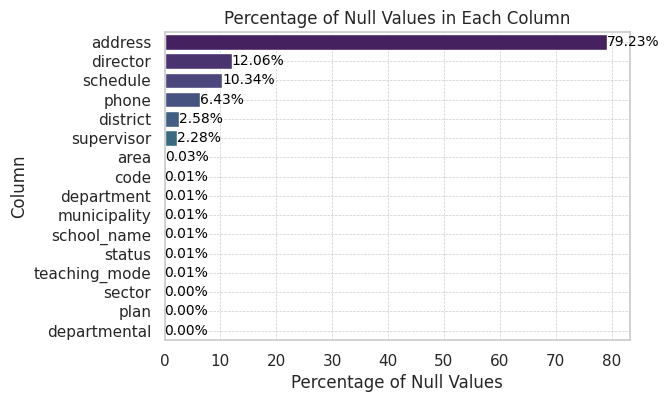

In [86]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the null_percentage Series from highest to lowest
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Create a horizontal bar chart
ax = sns.barplot(x=null_percentage_sorted.values, y=null_percentage_sorted.index, hue=null_percentage_sorted.index, dodge=False, palette='viridis')

# Add percentage in each bar
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width,       # X coordinate of text
            bar.get_y() + bar.get_height() / 2,  # Y coordinate of text
            '{:.2f}%'.format(width),  # Text to display (formatted to two decimal places)
            ha='left',  # Horizontal alignment
            va='center',  # Vertical alignment
            color='black',  # Text color
            fontsize=10)  # Font size

plt.xlabel("Percentage of Null Values")  # Updated label
plt.ylabel("Column")  # Updated label
plt.title("Percentage of Null Values in Each Column")  # Fixed closing quote

# Adding grid with custom style
plt.grid(True, linestyle='--', linewidth=0.5)  # Adding grid with dashed lines and custom line width

plt.show()

**Observaciones 💡 -->**

Aunque hay una cantidad significativa de valores nulos en una gran parte de las columnas del conjunto de datos, actualmente no contamos con información suficiente sobre el propósito de estos datos. Por lo tanto, no sería apropiado tomar decisiones drásticas en cuanto a la imputación de datos faltantes. En su lugar, se establecerá una representación coherente para indicar la falta de información en todo el conjunto de datos, utilizando la etiqueta "Sin especificar" para todas las columnas.

In [87]:
df.fillna("Sin especificar", inplace=True)

In [88]:
df.head(2)

,code,district,department,municipality,school_name,address,phone,supervisor,director,sector,area,status,teaching_mode,schedule,plan,departmental
0,16-01-0138-46,16-031,Alta Verapaz,Coban,Colegio Coban,Sin especificar,[7794-5104],Mercedes Josefina Torres Galvez,Gustavo Adolfo Sierra Pop,Privado,Urbana,Abierta,Monolingue,Matutina,Diario,Verapaz
1,16-01-0139-46,16-031,Alta Verapaz,Coban,Colegio Particular Mixto Verapaz,Sin especificar,[7736-7402],Mercedes Josefina Torres Galvez,Gilma Dolores Guay Paz De Leal,Privado,Urbana,Abierta,Monolingue,Matutina,Diario,Verapaz


## **(5) Clean CSV File Generation 📁**

In [90]:
df.to_csv("mineduc_diversificado.csv", index=False)